# Search FORS2 galaxies in GALEX catalogs (CSV)

- author : Sylvie Dagoret-Campagne
- creation date : 2023-05-30
- last update : 2023-05-30


Be sure we have the latest version of GALEX/AIS

Retrieve data from web page (no spectrum, no redshift selection) into a csv file
https://galex.stsci.edu/GR6/?page=mastform


In [1]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.coordinates as coordinates
from astropy.coordinates import angular_separation
#(lon1, lat1, lon2, lat2)
from astropy.coordinates import Angle
import astropy.units as u
import h5py
import pandas as pd
import numpy as np
import os
from astropy.io import fits
from astropy.table import Table

In [2]:
def GetColumnHfData(hff,list_of_keys,nameval):
    """
    Extract hff atttribute 
    
    parameters
      hff           : descriptor of h5 file
      list_of_keys : list of exposures
      nameval      : name of the attribute
      
    return
           the array of values in the order of 
    """
    

    all_data = []
    for key in list_of_keys:
        group=hff.get(key)
        val=group.attrs[nameval]
        all_data.append(val)
    return all_data


In [3]:
def ReadFors2h5FileAttributes(hf):
    hf =  h5py.File(input_file_h5, 'r') 
    list_of_keys = list(hf.keys())
    # pick one key    
    key_sel =  list_of_keys[0]
    # pick one group
    group = hf.get(key_sel)  
    #pickup all attribute names
    all_subgroup_keys = []
    for k in group.attrs.keys():
        all_subgroup_keys.append(k)
    # create info
    df_info = pd.DataFrame()
    for key in all_subgroup_keys:
        arr=GetColumnHfData(hf, list_of_keys ,key)
        df_info[key] = arr
    df_info.sort_values(by="num", ascending=True,inplace=True)
    df_info_num = df_info["num"].values
    key_tags = [ f"SPEC{num}" for num in df_info_num ]
    df_info["name"] = key_tags
    
    #'Nsp', 'RT', 'RV', 'Rmag', 'dec', 'eRV', 'lines', 'num', 'ra', 'redshift',
    
    df_info = df_info[['num' ,'name', 'ra', 'dec', 'Rmag','redshift','lines','RT','RV','eRV','Nsp']]
    return df_info
    

## Catalogs

In [4]:
path =  "../data/GALEX_Photometry"
filenames_galexcat = os.listdir(path)

In [5]:
!ls ../data/GALEX_Photometry

galex_1217232890.csv


In [6]:
if '.DS_Store' in filenames_galexcat:
    filenames_galexcat.remove('.DS_Store')

In [7]:
all_df = []

for idx,filename  in enumerate(filenames_galexcat):
    fullfilename = os.path.join(path,filename)
    df = pd.read_csv(fullfilename)
    all_df.append(df)

In [8]:
df_galex = all_df[0]

In [9]:
df_galex

,objid,specObjID,distance_arcmin,IAUName,ra,dec,band,fuv_mag,nuv_mag,fuv_flux,...,nuv_magerr,fuv_flux1,fuv_fluxerr,fuv_mag1,fuv_magerr,nuv_skybg,fuv_skybg,NUV_CLASS_STAR,FUV_CLASS_STAR,E_bv1
0,6380802579077530534,0,1.005196,GALEX J005358.4-282416,13.493582,-28.404687,1,-999.00000,21.51079,-999.00000,...,0.360429,-999.00000,-999.000000,-999.00000,-999.000000,0.001060,0.000118,0.946690,0.000000,0.018034
1,6380802579077530499,0,1.155980,GALEX J005405.8-282454,13.524429,-28.415100,1,-999.00000,22.17334,-999.00000,...,0.472773,-999.00000,-999.000000,-999.00000,-999.000000,0.001053,0.000117,0.910946,0.000000,0.017570
2,6380802579077530550,0,1.283224,GALEX J005357.0-282407,13.487534,-28.402020,1,-999.00000,22.72675,-999.00000,...,0.536845,-999.00000,-999.000000,-999.00000,-999.000000,0.001062,0.000118,0.942114,0.000000,0.018034
3,6380802579077530502,0,1.360795,GALEX J005358.2-282453,13.492673,-28.414775,1,-999.00000,22.30887,-999.00000,...,0.455726,-999.00000,-999.000000,-999.00000,-999.000000,0.001056,0.000117,0.877401,0.000000,0.018034
4,6380802579077530542,0,1.382707,GALEX J005409.0-282410,13.537556,-28.402986,1,-999.00000,22.45016,-999.00000,...,0.513862,-999.00000,-999.000000,-999.00000,-999.000000,0.001056,0.000118,0.927378,0.000000,0.018765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6380802579077530754,0,5.422296,GALEX J005342.6-282050,13.427648,-28.347463,1,-999.00000,22.08794,-999.00000,...,0.433436,-999.00000,-999.000000,-999.00000,-999.000000,0.001104,0.000121,0.951901,0.000000,0.019484
96,6380802579077530308,0,5.428528,GALEX J005418.9-282804,13.578807,-28.467999,1,-999.00000,22.06491,-999.00000,...,0.404295,-999.00000,-999.000000,-999.00000,-999.000000,0.001055,0.000117,0.923722,0.000000,0.017516
97,6380802579077530370,0,5.456873,GALEX J005424.5-282635,13.602319,-28.443209,1,-999.00000,21.15274,-999.00000,...,0.287115,-999.00000,-999.000000,-999.00000,-999.000000,0.001056,0.000119,0.983299,0.000000,0.017783
98,6380802579079627345,0,5.480504,GALEX J005359.9-282924,13.499762,-28.490180,3,20.09382,19.92443,33.30223,...,0.131923,33.30223,6.364304,20.09382,0.207543,0.001050,0.000113,0.413015,0.993001,0.016718


In [35]:
df_galex.rename(columns={"ra":"ra_galex","dec":"dec_galex"},inplace=True)

## Read FORS2 catalog

In [12]:
input_file_h5  = '../data/FORS2spectra.hdf5'

In [13]:
hf =  h5py.File(input_file_h5, 'r') 
list_of_keys = list(hf.keys())

In [14]:
df_info = ReadFors2h5FileAttributes(hf)

In [15]:
df_info = df_info[['num', 'ra', 'dec', 'Rmag','redshift']]

In [16]:
df_info.reset_index(drop=True, inplace=True) 

In [17]:
df_info

,num,ra,dec,Rmag,redshift
0,2,13.52997,-28.44776,21.18,0.34555
1,3,13.52552,-28.42080,21.45,0.68660
2,9,13.50219,-28.40641,21.60,0.29266
3,13,13.49261,-28.38272,23.14,0.68870
4,19,13.60758,-28.43452,21.70,0.48395
...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012
546,735,13.69958,-28.23161,19.28,0.36169
547,736,13.66431,-28.22849,21.64,0.55777
548,737,13.62722,-28.22692,21.40,0.52001


## Get FORS2 spectra

In [18]:
df_info_num = df_info["num"].values
key_tags = [ f"SPEC{num}" for num in df_info_num ]

In [19]:
all_df = []   
idx=0
for key in key_tags :
    group = hf.get(key)
    df = pd.DataFrame()
    df["wl"] = np.array(group.get("wl"))
    df["fl"] = np.array(group.get("fl")) 
    all_df.append(df)
    idx+=1

## GALEX catalog

### find central cluster coordinates

In [20]:
target_name_simbad = "BAX 013.5117-28.3994"
target_name_ned = "RX J0054.0-2823"

In [21]:
result_table = Simbad.query_object(target_name_simbad)

In [22]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
BAX 013.5117-28.3994,00 54 02.8,-28 23 58,5,5,--,--,0,D,,1998ApJ...502..558V,1


In [23]:
ra_str = result_table['RA'][0] + ' hours'
dec_str = result_table['DEC'][0] + ' degree'

In [24]:
coord = coordinates.SkyCoord(ra_str,dec_str)
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (13.51166667, -28.39944444)>

In [25]:
coord.ra.deg

13.511666666666665

In [26]:
coord.dec.deg

-28.399444444444445

In [36]:
result_ptable = df_galex
result_ptable.head()

,objid,specObjID,distance_arcmin,IAUName,ra_galex,dec_galex,band,fuv_mag,nuv_mag,fuv_flux,...,nuv_magerr,fuv_flux1,fuv_fluxerr,fuv_mag1,fuv_magerr,nuv_skybg,fuv_skybg,NUV_CLASS_STAR,FUV_CLASS_STAR,E_bv1
0,6380802579077530534,0,1.005196,GALEX J005358.4-282416,13.493582,-28.404687,1,-999.0,21.51079,-999.0,...,0.360429,-999.0,-999.0,-999.0,-999.0,0.001060,0.000118,0.946690,0.0,0.018034
1,6380802579077530499,0,1.155980,GALEX J005405.8-282454,13.524429,-28.415100,1,-999.0,22.17334,-999.0,...,0.472773,-999.0,-999.0,-999.0,-999.0,0.001053,0.000117,0.910946,0.0,0.017570
2,6380802579077530550,0,1.283224,GALEX J005357.0-282407,13.487534,-28.402020,1,-999.0,22.72675,-999.0,...,0.536845,-999.0,-999.0,-999.0,-999.0,0.001062,0.000118,0.942114,0.0,0.018034
3,6380802579077530502,0,1.360795,GALEX J005358.2-282453,13.492673,-28.414775,1,-999.0,22.30887,-999.0,...,0.455726,-999.0,-999.0,-999.0,-999.0,0.001056,0.000117,0.877401,0.0,0.018034
4,6380802579077530542,0,1.382707,GALEX J005409.0-282410,13.537556,-28.402986,1,-999.0,22.45016,-999.0,...,0.513862,-999.0,-999.0,-999.0,-999.0,0.001056,0.000118,0.927378,0.0,0.018765


In [ ]:
#for colname in result_ptable.columns:
#    print(colname)

In [29]:
N = len(result_ptable)

In [ ]:
#all_ra = np.array([ Angle(result_table['RA'][idx] + ' hours').deg for idx in range(N) ])
#all_dec = np.array([ Angle(result_table['DEC'][idx] + ' degrees').deg for idx in range(N) ])

In [37]:
all_ra = np.array([result_ptable['ra_galex'].iloc[idx] for idx in range(N) ])
all_dec = np.array([result_ptable['dec_galex'].iloc[idx]  for idx in range(N) ])

In [38]:
catalog_galex = SkyCoord(all_ra*u.degree,all_dec*u.degree)

https://docs.astropy.org/en/stable/coordinates/matchsep.html#astropy-coordinates-matching

In [39]:
all_idx = []  # index of the match
all_d2d = []  # distance in arcsec
all_d3d = []

for index, row in df_info.iterrows():
    c = coordinates.SkyCoord(row['ra']*u.degree, row['dec']*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog_galex)
    all_idx.append(int(idx))
    all_d2d.append(Angle(d2d[0]).arcsec)
    all_d3d.append(d3d)
    #print(idx,Angle(d2d[0]).arcsec,d3d)
    


In [40]:
all_idx = np.array(all_idx)

Text(0.5, 1.0, 'Angular separation FORS2-Galex')

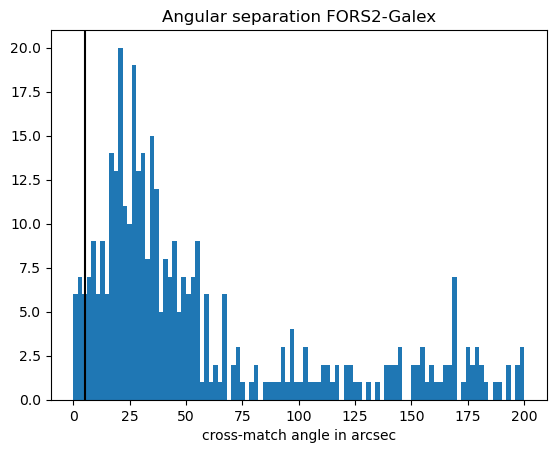

In [61]:
plt.hist(all_d2d,bins=100,range=(0,200));
plt.xlabel("cross-match angle in arcsec")
plt.axvline(5.0,color="k")
plt.title("Angular separation FORS2-Galex")

Text(0.5, 1.0, 'Angular separation FORS2-Galex')

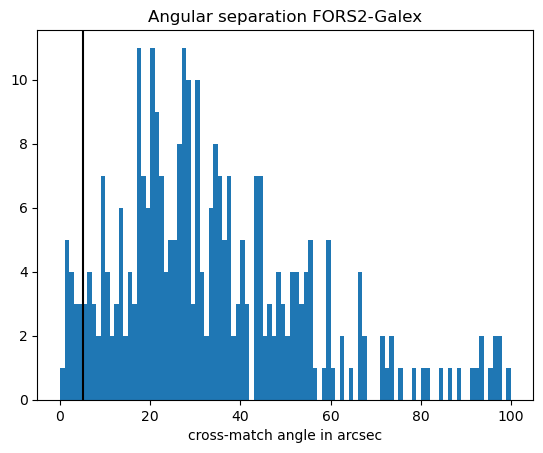

In [60]:
plt.hist(all_d2d,bins=100,range=(0,100));
plt.xlabel("cross-match angle in arcsec")
plt.axvline(5.0,color="k")
plt.title("Angular separation FORS2-Galex")

# Extract magnitudes

In [48]:
SelectedColumns = ["ra_galex","dec_galex","fuv_mag","nuv_mag","fuv_magerr","nuv_magerr","fuv_flux","nuv_flux","fuv_fluxerr","nuv_fluxerr" ]

In [49]:
result_ptable= result_ptable[SelectedColumns]

In [50]:
result_ptable

,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr
0,13.493582,-28.404687,-999.00000,21.51079,-999.000000,0.360429,-999.00000,9.029878,-999.000000,2.996898
1,13.524429,-28.415100,-999.00000,22.17334,-999.000000,0.472773,-999.00000,4.905293,-999.000000,2.135443
2,13.487534,-28.402020,-999.00000,22.72675,-999.000000,0.536845,-999.00000,2.946444,-999.000000,1.456522
3,13.492673,-28.414775,-999.00000,22.30887,-999.000000,0.455726,-999.00000,4.329625,-999.000000,1.816870
4,13.537556,-28.402986,-999.00000,22.45016,-999.000000,0.513862,-999.00000,3.801349,-999.000000,1.798681
...,...,...,...,...,...,...,...,...,...,...
95,13.427648,-28.347463,-999.00000,22.08794,-999.000000,0.433436,-999.00000,5.306708,-999.000000,2.117974
96,13.578807,-28.467999,-999.00000,22.06491,-999.000000,0.404295,-999.00000,5.420435,-999.000000,2.017915
97,13.602319,-28.443209,-999.00000,21.15274,-999.000000,0.287115,-999.00000,12.557550,-999.000000,3.319950
98,13.499762,-28.490180,20.09382,19.92443,0.207543,0.131923,33.30223,38.924790,6.364304,4.728446


## Create extended info dataframe

In [51]:
df_info_extended = pd.DataFrame(columns=SelectedColumns)

In [52]:
df_info_extended

,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr


In [53]:
N = len(df_info)
for index in range (N):
    index_galex_table = all_idx[index]
    df_info_extended.loc[index] = result_ptable.iloc[index_galex_table].values

In [54]:
df_info_extended

,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr
0,13.531423,-28.456012,20.42286,21.14517,0.252426,0.255224,24.59552,12.645370,5.7169,2.971828
1,13.524429,-28.415100,-999.00000,22.17334,-999.000000,0.472773,-999.00000,4.905293,-999.0000,2.135443
2,13.493582,-28.404687,-999.00000,21.51079,-999.000000,0.360429,-999.00000,9.029878,-999.0000,2.996898
3,13.488292,-28.374033,-999.00000,22.62969,-999.000000,0.543497,-999.00000,3.221977,-999.0000,1.612464
4,13.602319,-28.443209,-999.00000,21.15274,-999.000000,0.287115,-999.00000,12.557550,-999.0000,3.319950
...,...,...,...,...,...,...,...,...,...,...
545,13.589118,-28.341325,-999.00000,22.51917,-999.000000,0.507983,-999.00000,3.567218,-999.0000,1.668586
546,13.589118,-28.341325,-999.00000,22.51917,-999.000000,0.507983,-999.00000,3.567218,-999.0000,1.668586
547,13.580373,-28.335473,-999.00000,22.70105,-999.000000,0.545409,-999.00000,3.017031,-999.0000,1.515207
548,13.553772,-28.321536,-999.00000,22.18194,-999.000000,0.425872,-999.00000,4.866578,-999.0000,1.908415


In [55]:
df_info_extended["angularsep"] = all_d2d

## concatenate the pandas dataframe

- be carefull to have the indexes increasing from to to N (otherwise the merging is done on pandas dataframe index number)

In [56]:
df_info_concatenated = pd.concat([df_info, df_info_extended], axis=1)

In [57]:
df_info_concatenated

,num,ra,dec,Rmag,redshift,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr,angularsep
0,2,13.52997,-28.44776,21.18,0.34555,13.531423,-28.456012,20.42286,21.14517,0.252426,0.255224,24.59552,12.645370,5.7169,2.971828,30.060347
1,3,13.52552,-28.42080,21.45,0.68660,13.524429,-28.415100,-999.00000,22.17334,-999.000000,0.472773,-999.00000,4.905293,-999.0000,2.135443,20.808473
2,9,13.50219,-28.40641,21.60,0.29266,13.493582,-28.404687,-999.00000,21.51079,-999.000000,0.360429,-999.00000,9.029878,-999.0000,2.996898,27.954317
3,13,13.49261,-28.38272,23.14,0.68870,13.488292,-28.374033,-999.00000,22.62969,-999.000000,0.543497,-999.00000,3.221977,-999.0000,1.612464,34.131891
4,19,13.60758,-28.43452,21.70,0.48395,13.602319,-28.443209,-999.00000,21.15274,-999.000000,0.287115,-999.00000,12.557550,-999.0000,3.319950,35.437832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012,13.589118,-28.341325,-999.00000,22.51917,-999.000000,0.507983,-999.00000,3.567218,-999.0000,1.668586,486.710445
546,735,13.69958,-28.23161,19.28,0.36169,13.589118,-28.341325,-999.00000,22.51917,-999.000000,0.507983,-999.00000,3.567218,-999.0000,1.668586,527.855153
547,736,13.66431,-28.22849,21.64,0.55777,13.580373,-28.335473,-999.00000,22.70105,-999.000000,0.545409,-999.00000,3.017031,-999.0000,1.515207,468.126892
548,737,13.62722,-28.22692,21.40,0.52001,13.553772,-28.321536,-999.00000,22.18194,-999.000000,0.425872,-999.00000,4.866578,-999.0000,1.908415,412.608678


## Save file

In [58]:
outputfile = "info_fors2GALEX_fromweb_crossmatch.csv"

In [59]:
df_info_concatenated.to_csv(outputfile)